<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (3 Marks)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [81]:
import json
import pandas as pd
# Opening JSON file 
with open(r'/content/drive/My Drive/Sarcasm Detection/Data/Sarcasm_Headlines_Dataset.json', buffering=1000) as f:
  #Reading from file 
  data_lists = []
  for row in f:
    data_dict = json.loads(row) 
    data_lists.append(data_dict)

In [82]:
data_lists[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [83]:
df = pd.DataFrame.from_dict(data_lists)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


### Drop `article_link` from dataset (3 Marks)

In [84]:
df.drop('article_link',axis=1,inplace=True)
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


### Get length of each headline and add a column for that (3 Marks)

In [85]:
df['headline_length'] = df['headline'].apply(lambda x: len(x))
df.head()

,headline,is_sarcastic,headline_length
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


In [86]:
df.shape

(26709, 3)

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [87]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (3 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [88]:
import tensorflow as tf

In [89]:
 tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)

In [90]:
X = df['headline']
tokenizer.fit_on_texts(X.tolist())

In [91]:
# Transforms each text in texts to a sequence of integers. Only top num_words-1 most frequent words will be taken into account. Only words known by the tokenizer will be taken into account.
X = tokenizer.texts_to_sequences(df['headline'].values)

In [92]:
len(tokenizer.word_index)

29656

### Pad sequences (3 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [93]:
X_pad = tf.keras.preprocessing.sequence.pad_sequences(X,maxlen=maxlen,padding='pre')

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    df['is_sarcastic'],
    test_size=0.2, 
    random_state=42
)

### Vocab mapping
- There is no word for 0th index

In [96]:
len(tokenizer.word_index)

29656

In [97]:
tokenizer.word_index.items()

dict_items([('to', 1), ('of', 2), ('the', 3), ('in', 4), ('for', 5), ('a', 6), ('on', 7), ('and', 8), ('with', 9), ('is', 10), ('new', 11), ('trump', 12), ('man', 13), ('from', 14), ('at', 15), ('about', 16), ('you', 17), ('this', 18), ('by', 19), ('after', 20), ('up', 21), ('out', 22), ('be', 23), ('how', 24), ('as', 25), ('it', 26), ('that', 27), ('not', 28), ('are', 29), ('your', 30), ('his', 31), ('what', 32), ('he', 33), ('all', 34), ('just', 35), ('who', 36), ('has', 37), ('will', 38), ('more', 39), ('one', 40), ('into', 41), ('report', 42), ('year', 43), ('why', 44), ('have', 45), ('area', 46), ('over', 47), ('donald', 48), ('u', 49), ('day', 50), ('says', 51), ('s', 52), ('can', 53), ('first', 54), ('woman', 55), ('time', 56), ('like', 57), ('her', 58), ("trump's", 59), ('old', 60), ('no', 61), ('get', 62), ('off', 63), ('an', 64), ('life', 65), ('people', 66), ('obama', 67), ('now', 68), ('house', 69), ('still', 70), ("'", 71), ('women', 72), ('make', 73), ('was', 74), ('than'

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [98]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

29657


### Load Glove Word Embeddings (3 Marks)

In [59]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-11-08 10:42:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-11-08 10:42:08--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-11-08 10:42:09--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [71]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


### Create embedding matrix

In [99]:
import numpy as np 
EMBEDDING_FILE = '/content/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

### Define model (5 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [119]:
# define model
model = Sequential()
embedding_layer = Embedding(input_dim=num_words, output_dim=embedding_size, weights=[embedding_matrix], input_length=maxlen)
model.add(embedding_layer)
model.add(Bidirectional(LSTM(embedding_size)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(25, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [120]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 25, 200)           5931400   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 400)               641600    
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                20050     
_________________________________________________________________
batch_normalization_3 (Batch (None, 50)                200       
_________________________________________________________________
dense_13 (Dense)             (None, 25)                1275      
_________________________________________________________________
batch_normalization_4 (Batch (None, 25)               

### Compile the model (3 Marks)

In [121]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Fit the model (4 Marks)

In [123]:
num_epochs=3  # Running for only 3 epochs because val loss is increasing after 3 epochs 
batch_size=32

In [124]:
model_history = model.fit(X_train, y_train, batch_size=batch_size,epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/3
668/668 [==============================] - 42s 62ms/step - loss: 0.4474 - accuracy: 0.7862 - val_loss: 0.6058 - val_accuracy: 0.7364
Epoch 2/3
668/668 [==============================] - 41s 61ms/step - loss: 0.2643 - accuracy: 0.8919 - val_loss: 0.3004 - val_accuracy: 0.8678
Epoch 3/3
668/668 [==============================] - 41s 61ms/step - loss: 0.1858 - accuracy: 0.9289 - val_loss: 0.3316 - val_accuracy: 0.8735


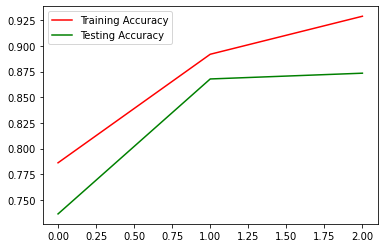

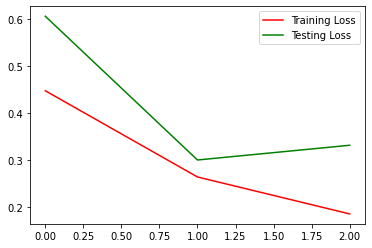

In [125]:
import matplotlib.pyplot as plt
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()